Tasks:

1. Enhance both programs by developing functions that accept data and appropriate boundary parameter values (ranges of their variation) as attributes and return a list of the optimal parameters. Subsequently, apply these functions to the relevant datasets and visualize the results obtained.

2. Implement the k-means clustering algorithm combined with the Bayesian optimization algorithm for the clustering of the seeds dataset, utilizing a function and visualization of the results. Download seeds dataset from https://www.kaggle.com/datasets/rwzhang/seeds-dataset

3. Implement the DBSCAN and OPTICS clustering algorithms combined with the Bayesian optimization algorithm for the clustering of the aggregation and compound datasets, utilizing a function and visualization of the results.

|   iter    |  target   | n_clus... |
-------------------------------------


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 1         | 840.8     | 4.996     |
| 2         | 859.2     | 9.606     |
| 3         | 858.0     | 7.856     |
| 4         | 870.6     | 6.789     |
| 5         | 997.5     | 3.248     |
| 6         | 1.03e+03  | 2.849     |


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

| 7         | 1.03e+03  | 2.0       |
| 8         | 1.03e+03  | 2.409     |
| 9         | 1.03e+03  | 2.649     |


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

| 10        | 1.03e+03  | 2.173     |
| 11        | 1.03e+03  | 2.762     |
| 12        | 1.03e+03  | 2.522     |
| 13        | 1.03e+03  | 2.284     |


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

| 14        | 1.03e+03  | 2.073     |
| 15        | 1.03e+03  | 2.806     |
Optimal KMeans Parameters: {'n_clusters': 2.8488634615574697}


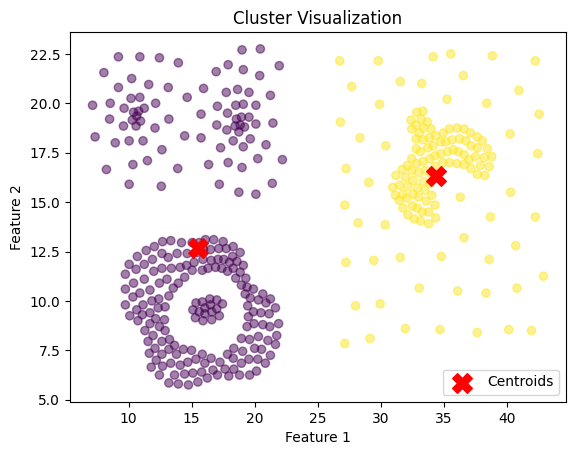

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import calinski_harabasz_score
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, OPTICS, KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("Compound.csv")

def kmeans_optimization(data, n_clusters_bounds):
    def evaluate_kmeans(n_clusters):
        kmeans = KMeans(n_clusters=int(n_clusters), random_state=42)
        labels = kmeans.fit_predict(data)
        return calinski_harabasz_score(data, labels)

    optimizer = BayesianOptimization(
        f=evaluate_kmeans,
        pbounds={'n_clusters': n_clusters_bounds},
        random_state=42,
    )

    optimizer.maximize(init_points=5, n_iter=10)

    optimal_parameters = optimizer.max['params']
    return optimal_parameters

optimal_kmeans_params = kmeans_optimization(data, n_clusters_bounds=(2, 10))
print("Optimal KMeans Parameters:", optimal_kmeans_params)

# Extract results for plotting
kmeans = KMeans(n_clusters=int(optimal_kmeans_params['n_clusters']), random_state=42)
labels = kmeans.fit_predict(data)

# Plot the clusters
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()





       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
|   iter    |  target   | n_clus... |
-------------------------------------
| 1         | 314.5     | 4.996     |
| 2         | 265.0     | 9.606     |
| 3         | 279.1     | 7.856     |
| 4         | 277.0     | 6.789     |
| 5         | 369.5     | 3.248     |
| 6         | 310.5     | 2.0       |


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

| 7         | 369.5     | 3.862     |
| 8         | 369.5     | 3.554     |
| 9         | 310.5     | 2.898     |
| 10        | 369.5     | 3.455     |


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 11        | 369.5     | 3.554     |
| 12        | 314.5     | 4.342     |


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


| 13        | 290.2     | 5.779     |
| 14        | 274.3     | 8.694     |
| 15        | 369.5     | 3.732     |


C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


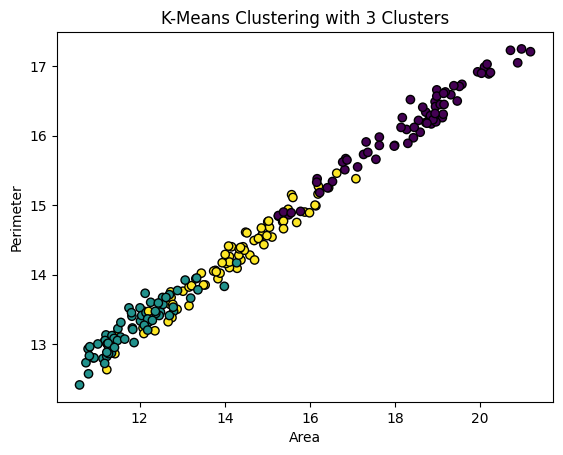

In [2]:
data = pd.read_csv("seeds_dataset.txt", sep="\t", header=None)
print(data.head())

n_clusters_bounds = (2, 10)


optimal_kmeans_params = kmeans_optimization(data, n_clusters_bounds)
optimal_n_clusters = int(optimal_kmeans_params['n_clusters'])

# Perform K-Means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
labels = kmeans.fit_predict(data.drop([0], axis=1))  # Assuming the target column is present

# Visualize the results
plt.scatter(data[0], data[1], c=labels, cmap='viridis', edgecolors='k')
plt.title(f'K-Means Clustering with {optimal_n_clusters} Clusters')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.show()

|   iter    |  target   |    eps    | min_sa... |
-------------------------------------------------
| 1         | 7.784e+03 | 0.8116    | 9.606     |
| 2         | 785.5     | 1.491     | 6.789     |
| 3         | 7.813e+03 | 0.3964    | 3.248     |
| 4         | 4.24e+03  | 0.2104    | 8.929     |
| 5         | 772.8     | 1.242     | 7.665     |
| 6         | -1.0      | 2.0       | 10.0      |
| 7         | 7.813e+03 | 0.4666    | 3.172     |
| 8         | 764.1     | 1.193     | 3.878     |
| 9         | 902.7     | 0.1       | 2.662     |
| 10        | 7.784e+03 | 0.4197    | 9.754     |
| 11        | 7.784e+03 | 0.7704    | 9.991     |
| 12        | 1.076e+03 | 0.1071    | 4.08      |
| 13        | 782.0     | 1.288     | 2.672     |
| 14        | 7.784e+03 | 0.4127    | 9.747     |
| 15        | 851.7     | 0.1       | 5.959     |


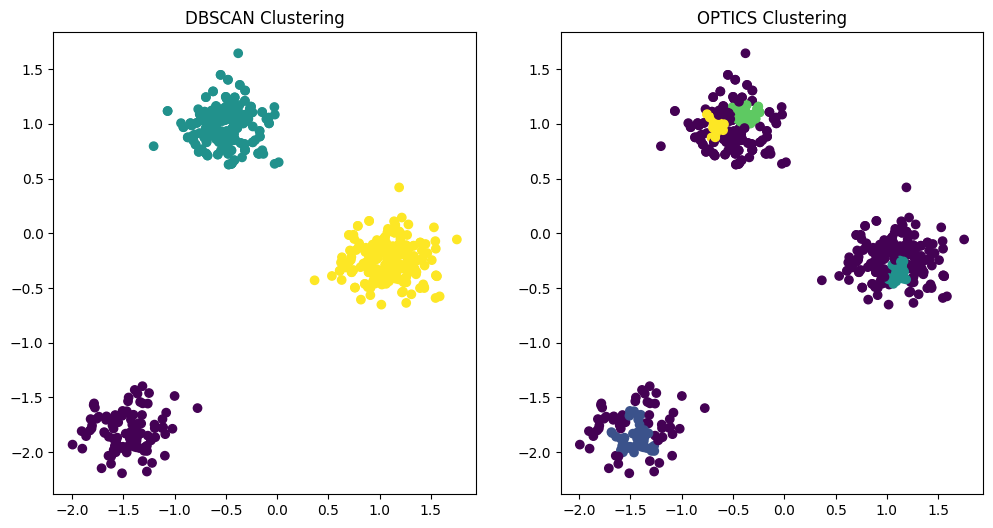

In [3]:
data1 = pd.read_csv('aggregation.csv')
data2 = pd.read_csv('compound.csv')

# Generate synthetic dataset (you can replace this with your actual datasets)
np.random.seed(42)
data1, _ = make_blobs(n_samples=300, centers=3, random_state=42)
data2, _ = make_blobs(n_samples=300, centers=2, random_state=42)
data = np.concatenate([data1, data2])

# Normalize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Function to evaluate clustering performance with silhouette score
def evaluate_clustering(eps, min_samples):
    min_samples = int(round(min_samples))  # Round to the nearest integer
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    optics = OPTICS(min_samples=min_samples, xi=0.05, min_cluster_size=0.05)
    
    dbscan_labels = dbscan.fit_predict(data)
    optics_labels = optics.fit_predict(data)
    
    # Check if there is only one cluster
    if len(np.unique(dbscan_labels)) < 2 or len(np.unique(optics_labels)) < 2:
        return -1  # Return a very low score for Bayesian optimization
    
    dbscan_score = calinski_harabasz_score(data, dbscan_labels)
    optics_score = calinski_harabasz_score(data, optics_labels)
    
    return dbscan_score + optics_score  # Combine scores for Bayesian optimization

# Bayesian optimization setup
param_bounds = {'eps': (0.1, 2.0), 'min_samples': (2, 10)}

bo = BayesianOptimization(evaluate_clustering, param_bounds, random_state=42)

# Perform Bayesian optimization
bo.maximize(init_points=5, n_iter=10)

# Get the best parameters
best_params = bo.max['params']

# Final clustering with the best parameters
best_eps = best_params['eps']
best_min_samples = int(round(best_params['min_samples']))

final_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
final_optics = OPTICS(min_samples=best_min_samples, xi=0.05, min_cluster_size=0.05)

final_dbscan_labels = final_dbscan.fit_predict(data)
final_optics_labels = final_optics.fit_predict(data)

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=final_dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=final_optics_labels, cmap='viridis')
plt.title('OPTICS Clustering')

plt.show()